In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC


In [4]:
def plot_svm_fruit_classification(X, y, model):
    plt.figure(figsize=(8, 6))

    # Scatter plot for fruits
    plt.scatter(
        X[y == 0][:, 0], X[y == 0][:, 1],
        color="red", label="Apples", alpha=0.7
    )
    plt.scatter(
        X[y == 1][:, 0], X[y == 1][:, 1],
        color="orange", label="Oranges", alpha=0.7
    )

    # Create mesh grid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Decision function
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(
        XX, YY, Z,
        colors="black",
        levels=[-1, 0, 1],
        linestyles=["--", "-", "--"]
    )

    # Highlight support vectors
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=120,
        facecolors="none",
        edgecolors="black",
        label="Support Vectors"
    )

    # Labels and title
    plt.xlabel("Fruit Size")
    plt.ylabel("Sweetness Level")
    plt.title("Linear SVM Classification of Fruits")
    plt.legend()
    plt.grid(True)
    plt.show()


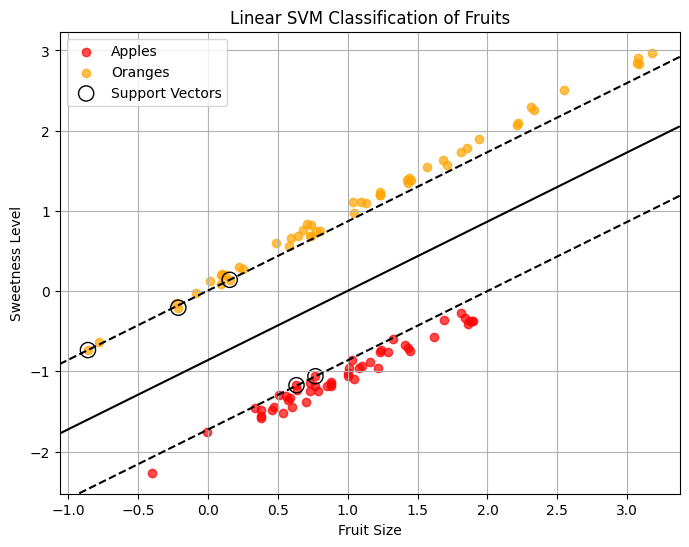

In [3]:
# Create dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

# Train Linear SVM
svm_model = SVC(kernel="linear")
svm_model.fit(X, y)

# Visualize results
plot_svm_fruit_classification(X, y, svm_model)
